In [2]:
import matplotlib.pyplot as plt
import pathlib

### Import segyfile

In [3]:
V3D_path = pathlib.Path("segy_data/file_5.sgy")
print("3D", V3D_path, V3D_path.exists())

3D segy_data/file_5.sgy True


### Show text header

In [4]:
from segysak.segy import get_segy_texthead
get_segy_texthead(V3D_path)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
ÝCroC 3
C 4 First inline: 10090  Last inline: 10150
C 5 First xline:  2150   Last xline:  2351
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [5]:
from segysak.segy import segy_header_scan

scan = segy_header_scan(V3D_path)
scan

  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0
TRACE_SEQUENCE_FILE,5,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0
FieldRecord,9,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0
TraceNumber,13,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0
EnergySourcePoint,17,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0


In [6]:
scan[scan["std"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
TRACE_SEQUENCE_FILE,5,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
FieldRecord,9,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
TraceNumber,13,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
CDP,21,1000.0,2.249540e+03,57.831072,2150.0,2.199750e+03,2249.5,2.299250e+03,2351.0
SourceX,73,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0
SourceY,77,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0
CDP_X,181,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0
CDP_Y,185,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0
INLINE_3D,189,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0


In [7]:
from segysak.segy import segy_header_scrape

scrape = segy_header_scrape(V3D_path, partial_scan=10)
scrape

  0%|          | 0.00/10.0 [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,10090,10090,1,0,2150,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,10090,10090,2,0,2151,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10090,10090,3,0,2152,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10090,10090,4,0,2153,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10090,10090,5,0,2154,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,10090,10090,6,0,2155,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,10090,10090,7,0,2156,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,10090,10090,8,0,2157,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,10090,10090,9,0,2158,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,10090,10090,10,0,2159,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### xline iline twt 

In [8]:
from segysak.segy import segy_loader, well_known_byte_locs

V3D = segy_loader(V3D_path, iline=189, xline=193, cdpx=73, cdpy=77, vert_domain="TWT")
V3D

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (iline: 61, xline: 202, twt: 850)
Coordinates:
  * iline    (iline) uint16 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) uint16 2150 2151 2152 2153 2154 ... 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float32 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         file_5.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.595060190682801, -6.114936243337226, -1.50399996...
    coord_scalar:        -100.0

### (xline, yline) twt=4 

Text(0.5, 0, 'xline')

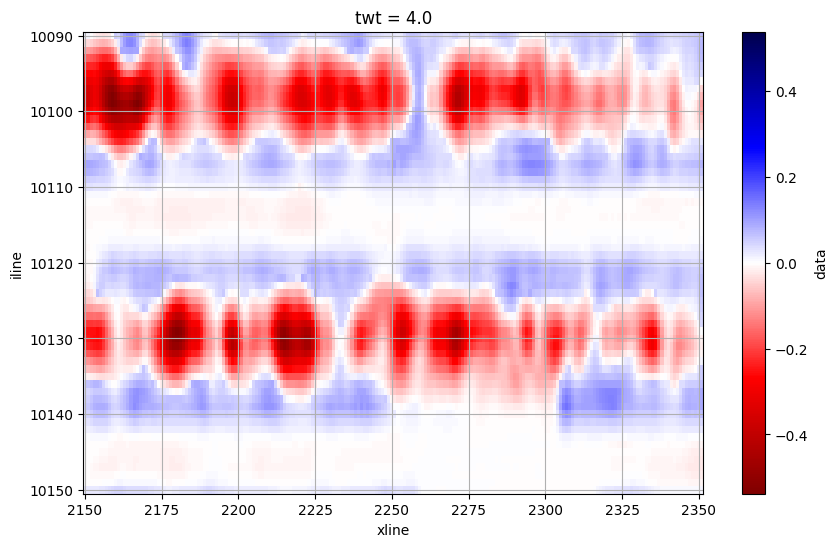

In [9]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
iline_sel = 10090
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    twt=4
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("iline")
plt.xlabel("xline")

### (xline, yline) twt=60

Text(0.5, 0, 'xline')

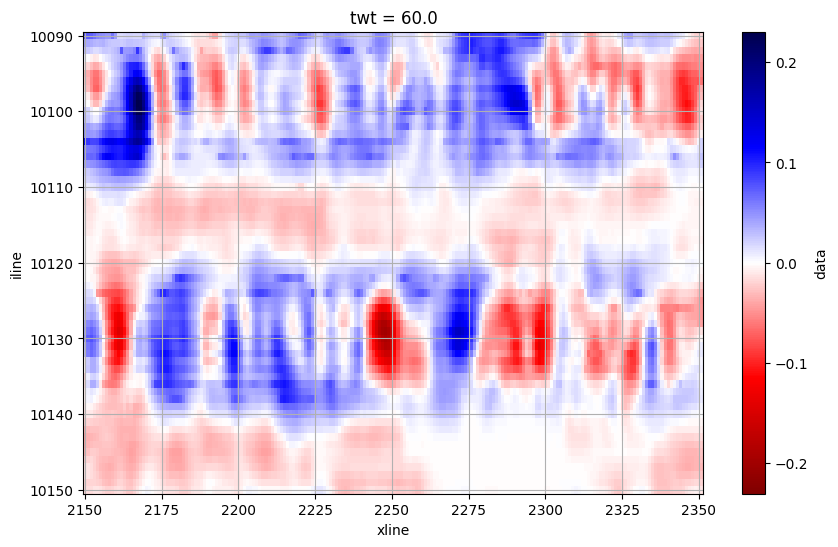

In [10]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
iline_sel = 10090
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    twt=60
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("iline")
plt.xlabel("xline")

### (iline, twt) xline=2151

Text(0.5, 0, 'ILINE')

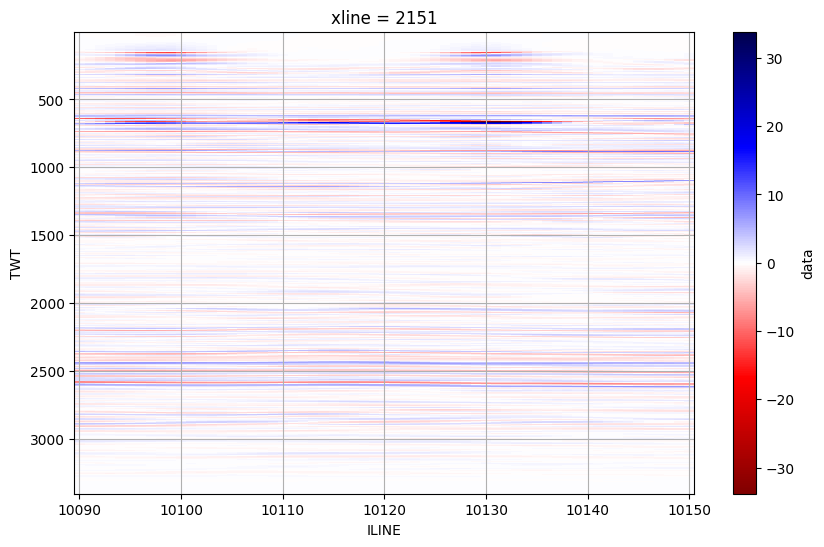

In [11]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
xline_sel = 2151
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    xline=xline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("ILINE")